In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import os
from glob import glob
from os.path import join as pathjoin
import h5py
import time

import imp
import donglab_workflows as dw
imp.reload(dw)
import PIL.Image as Image
Image.MAX_IMAGE_PIXELS = None
import tifffile as tf # for 16 bit tiff

# downsample lightsheet

The mit data is stored in tif stacks
the size is
Image resolution is 1.8 µm x 1.8 µm x 2.0 µm (xyz), and the stack can be found at our network storage space at BMAP.



In [12]:
# filename
#input_filename = '/home/dtward/bmaproot/panfs/dong/Scans/3D/sw210111-01/Raw_LS_4X/sw210111-01-4X_ZStep4um_75p4ms_Stitched_Ex_488_Em_0.ims'
#input_filename = '/home/dtward/bmaproot/panfs/dong/Scans/3D/sw210111-01/Raw_LS_4X/sw210111-01-4X_ZStep4um_75p4ms_Stitched_Ex_561_Em_1.ims'
input_directory = '/home/dtward/bmaproot/panfs/dong/R01_Yin/642nm_NeuN'
output_filename = None # generate automatically if None

# we need a temporary output directory for intermediate results (each slice)
outdir = 'donglab_lightsheet_v00a'

dI = np.array([2.0,1.8,1.8]) # we need to input the voxel size, slice thickness first, in microns
res = 50.0
dataset_string = '' # this is not used for tifs


In [96]:
if output_filename is None:
    output_filename = os.path.splitext(os.path.split(input_filename)[-1])[0] + '_down.npz'
print(f'Input directory is {input_directory}')
print(f'Output filename is {output_filename}')
print(f'Resolution is {dI}')
print(f'Desired resolution is {res}')
print(f'Dataset string is {dataset_string}')

# temporary output dir
if not os.path.exists(outdir):
    os.mkdir(outdir)

Input directory is /home/dtward/bmaproot/panfs/dong/R01_Yin/642nm_NeuN
Output filename is 642nm_NeuN_down.npz
Resolution is [2.  1.8 1.8]
Desired resolution is 50.0
Dataset string is 


In [54]:
# I want 50 micron
down = np.floor(res/dI).astype(int)
print(f'Downsampling factors are {down}')
print(f'Downsampled res {dI*down}')

Downsampling factors are [25 27 27]
Downsampled res [50.  48.6 48.6]


In [97]:
# build a tif class with similar interface
class TifStack:
    '''We need a tif stack with an interface that will load a slice one at a time
    We assume each tif has the same size
    We assume 16
    '''
    def __init__(self,input_directory,pattern='*.tif'):
        self.input_directory = input_directory
        self.pattern = pattern
        self.files = glob(pathjoin(input_directory,pattern))
        self.files.sort()
        test = Image.open(self.files[0])
        self.nxy = test.size
        test.close()
        self.nz = len(self.files)
        self.shape = (self.nz,self.nxy[1],self.nxy[0]) # note, it is xy not rowcol
    def __getitem__(self,i):
        return tf.imread(self.files[i])/(2**16-1)
    def __len__(self):
        return len(self.files)
    def close(self):
        pass # nothing necessary
    


In [98]:
# load the data
data = TifStack(input_directory)

In [99]:
print(f'Dataset shape {data.shape}')

Dataset shape (3900, 10131, 7332)


In [90]:
nI = np.array(data.shape)
xI = [np.arange(n)*d - (n-1)/2.0*d for n,d in zip(nI,dI)]

In [91]:
xId = [dw.downsample(x,[d]) for x,d in zip(xI,down)]
dId = [x[1]-x[0] for x in xId]

In [92]:
dId

[50.0, 48.600000000000364, 48.599999999999454]

<IPython.core.display.Javascript object>


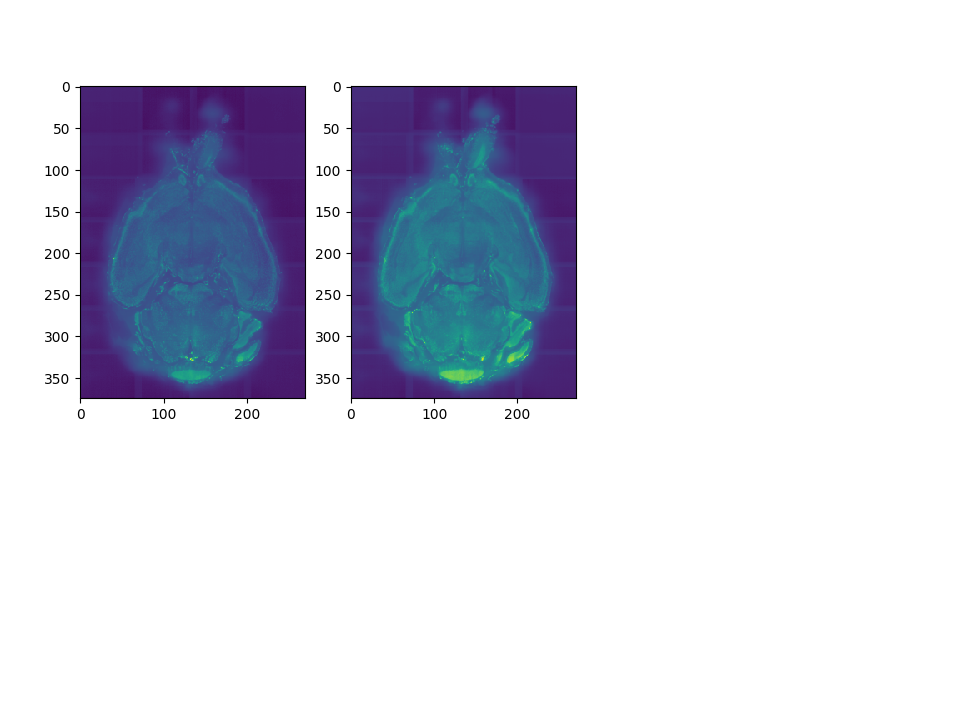

Finished loading slice 0 of 3900, time 2.9496145248413086 s
Finished loading slice 1 of 3900, time 3.080988645553589 s
Finished loading slice 2 of 3900, time 4.227702856063843 s
Finished loading slice 3 of 3900, time 2.976381778717041 s
Finished loading slice 4 of 3900, time 3.010481595993042 s
Finished loading slice 5 of 3900, time 5.6302220821380615 s
Finished loading slice 6 of 3900, time 4.009615898132324 s
Finished loading slice 7 of 3900, time 3.5280227661132812 s
Finished loading slice 8 of 3900, time 3.2179794311523438 s
Finished loading slice 9 of 3900, time 4.206886291503906 s
Finished loading slice 10 of 3900, time 3.208160161972046 s
Finished loading slice 11 of 3900, time 3.577453136444092 s
Finished loading slice 12 of 3900, time 3.0630838871002197 s
Finished loading slice 13 of 3900, time 3.174943447113037 s
Finished loading slice 14 of 3900, time 3.5752737522125244 s
Finished loading slice 15 of 3900, time 4.873525142669678 s
Finished loading slice 16 of 3900, time 4.40

Finished loading slice 136 of 3900, time 2.995346784591675 s
Finished loading slice 137 of 3900, time 3.2089736461639404 s
Finished loading slice 138 of 3900, time 3.239924669265747 s
Finished loading slice 139 of 3900, time 2.945951223373413 s
Finished loading slice 140 of 3900, time 3.131021738052368 s
Finished loading slice 141 of 3900, time 4.242058515548706 s
Finished loading slice 142 of 3900, time 3.162431478500366 s
Finished loading slice 143 of 3900, time 3.1334052085876465 s
Finished loading slice 144 of 3900, time 3.2925572395324707 s
Finished loading slice 145 of 3900, time 3.914703607559204 s
Finished loading slice 146 of 3900, time 5.282215118408203 s
Finished loading slice 147 of 3900, time 3.026878595352173 s
Finished loading slice 148 of 3900, time 3.040980100631714 s
Finished loading slice 149 of 3900, time 3.7068896293640137 s
Finished loading slice 150 of 3900, time 3.0251641273498535 s
Finished loading slice 151 of 3900, time 3.9428961277008057 s
Finished loading s

Finished loading slice 270 of 3900, time 4.074996471405029 s
Finished loading slice 271 of 3900, time 3.345038890838623 s
Finished loading slice 272 of 3900, time 4.2616448402404785 s
Finished loading slice 273 of 3900, time 3.079118490219116 s
Finished loading slice 274 of 3900, time 3.1084210872650146 s
Finished loading slice 275 of 3900, time 5.8794941902160645 s
Finished loading slice 276 of 3900, time 3.0747299194335938 s
Finished loading slice 277 of 3900, time 2.973947763442993 s
Finished loading slice 278 of 3900, time 4.0200395584106445 s
Finished loading slice 279 of 3900, time 3.0527942180633545 s
Finished loading slice 280 of 3900, time 3.173212766647339 s
Finished loading slice 281 of 3900, time 3.3072686195373535 s
Finished loading slice 282 of 3900, time 4.709164381027222 s
Finished loading slice 283 of 3900, time 3.0295445919036865 s
Finished loading slice 284 of 3900, time 3.190237522125244 s
Finished loading slice 285 of 3900, time 3.5845911502838135 s
Finished loadin

Finished loading slice 404 of 3900, time 3.363316774368286 s
Finished loading slice 405 of 3900, time 3.3944880962371826 s
Finished loading slice 406 of 3900, time 3.1374948024749756 s
Finished loading slice 407 of 3900, time 3.6600918769836426 s
Finished loading slice 408 of 3900, time 3.89923357963562 s
Finished loading slice 409 of 3900, time 3.617605209350586 s
Finished loading slice 410 of 3900, time 3.349762439727783 s
Finished loading slice 411 of 3900, time 3.112121105194092 s
Finished loading slice 412 of 3900, time 3.280803918838501 s
Finished loading slice 413 of 3900, time 3.131782054901123 s
Finished loading slice 414 of 3900, time 3.235222816467285 s
Finished loading slice 415 of 3900, time 3.7283554077148438 s
Finished loading slice 416 of 3900, time 3.5511674880981445 s
Finished loading slice 417 of 3900, time 3.697862148284912 s
Finished loading slice 418 of 3900, time 4.641830205917358 s
Finished loading slice 419 of 3900, time 4.130655288696289 s
Finished loading sli

Finished loading slice 538 of 3900, time 4.183301687240601 s
Finished loading slice 539 of 3900, time 3.8128082752227783 s
Finished loading slice 540 of 3900, time 3.2937605381011963 s
Finished loading slice 541 of 3900, time 3.274811029434204 s
Finished loading slice 542 of 3900, time 3.3008155822753906 s
Finished loading slice 543 of 3900, time 3.760910987854004 s
Finished loading slice 544 of 3900, time 3.124063491821289 s
Finished loading slice 545 of 3900, time 3.1398134231567383 s
Finished loading slice 546 of 3900, time 3.7194063663482666 s
Finished loading slice 547 of 3900, time 4.93000054359436 s
Finished loading slice 548 of 3900, time 3.137223243713379 s
Finished loading slice 549 of 3900, time 3.3362622261047363 s
Finished loading slice 550 of 3900, time 3.0768580436706543 s
Finished loading slice 551 of 3900, time 3.2429394721984863 s
Finished loading slice 552 of 3900, time 3.4848344326019287 s
Finished loading slice 553 of 3900, time 3.1488537788391113 s
Finished loadin

Finished loading slice 672 of 3900, time 3.3061139583587646 s
Finished loading slice 673 of 3900, time 4.5987389087677 s
Finished loading slice 674 of 3900, time 3.379683494567871 s
Finished loading slice 675 of 3900, time 3.3663480281829834 s
Finished loading slice 676 of 3900, time 3.3177709579467773 s
Finished loading slice 677 of 3900, time 3.3440418243408203 s
Finished loading slice 678 of 3900, time 3.6697590351104736 s
Finished loading slice 679 of 3900, time 4.512382745742798 s
Finished loading slice 680 of 3900, time 3.317138671875 s
Finished loading slice 681 of 3900, time 3.151289939880371 s
Finished loading slice 682 of 3900, time 3.1826412677764893 s
Finished loading slice 683 of 3900, time 5.135659217834473 s
Finished loading slice 684 of 3900, time 3.7288200855255127 s
Finished loading slice 685 of 3900, time 3.208648920059204 s
Finished loading slice 686 of 3900, time 3.4608654975891113 s
Finished loading slice 687 of 3900, time 3.1792404651641846 s
Finished loading sli

Finished loading slice 806 of 3900, time 3.776987314224243 s
Finished loading slice 807 of 3900, time 3.4317965507507324 s
Finished loading slice 808 of 3900, time 3.3699967861175537 s
Finished loading slice 809 of 3900, time 5.908636569976807 s
Finished loading slice 810 of 3900, time 4.03825831413269 s
Finished loading slice 811 of 3900, time 3.616882085800171 s
Finished loading slice 812 of 3900, time 3.4019699096679688 s
Finished loading slice 813 of 3900, time 3.2495486736297607 s
Finished loading slice 814 of 3900, time 3.419002056121826 s
Finished loading slice 815 of 3900, time 3.99473237991333 s
Finished loading slice 816 of 3900, time 3.5306215286254883 s
Finished loading slice 817 of 3900, time 3.4169254302978516 s
Finished loading slice 818 of 3900, time 3.291956663131714 s
Finished loading slice 819 of 3900, time 3.303489923477173 s
Finished loading slice 820 of 3900, time 3.967444896697998 s
Finished loading slice 821 of 3900, time 3.531651735305786 s
Finished loading sli

Finished loading slice 940 of 3900, time 3.293332576751709 s
Finished loading slice 941 of 3900, time 5.369279861450195 s
Finished loading slice 942 of 3900, time 4.792421102523804 s
Finished loading slice 943 of 3900, time 5.051095724105835 s
Finished loading slice 944 of 3900, time 4.52946400642395 s
Finished loading slice 945 of 3900, time 3.5266544818878174 s
Finished loading slice 946 of 3900, time 3.341285467147827 s
Finished loading slice 947 of 3900, time 3.4852426052093506 s
Finished loading slice 948 of 3900, time 3.896350145339966 s
Finished loading slice 949 of 3900, time 3.407945156097412 s
Finished loading slice 950 of 3900, time 4.214801788330078 s
Finished loading slice 951 of 3900, time 3.5660221576690674 s
Finished loading slice 952 of 3900, time 2.4380459785461426 s
Finished loading slice 953 of 3900, time 4.775608539581299 s
Finished loading slice 954 of 3900, time 3.247138500213623 s
Finished loading slice 955 of 3900, time 3.5340771675109863 s
Finished loading sli

Finished loading slice 1073 of 3900, time 4.189156770706177 s
Finished loading slice 1074 of 3900, time 3.8414084911346436 s
Finished loading slice 1075 of 3900, time 3.389431953430176 s
Finished loading slice 1076 of 3900, time 5.071990013122559 s
Finished loading slice 1077 of 3900, time 3.6439197063446045 s
Finished loading slice 1078 of 3900, time 3.4416961669921875 s
Finished loading slice 1079 of 3900, time 4.206906795501709 s
Finished loading slice 1080 of 3900, time 3.578648567199707 s
Finished loading slice 1081 of 3900, time 3.5891144275665283 s
Finished loading slice 1082 of 3900, time 3.9555065631866455 s
Finished loading slice 1083 of 3900, time 5.1645426750183105 s
Finished loading slice 1084 of 3900, time 5.0030646324157715 s
Finished loading slice 1085 of 3900, time 3.3359270095825195 s
Finished loading slice 1086 of 3900, time 3.7659947872161865 s
Finished loading slice 1087 of 3900, time 4.151400089263916 s
Finished loading slice 1088 of 3900, time 3.4861841201782227 

Finished loading slice 1205 of 3900, time 3.6548945903778076 s
Finished loading slice 1206 of 3900, time 3.3880374431610107 s
Finished loading slice 1207 of 3900, time 3.547142505645752 s
Finished loading slice 1208 of 3900, time 4.667632818222046 s
Finished loading slice 1209 of 3900, time 3.4936420917510986 s
Finished loading slice 1210 of 3900, time 3.462892770767212 s
Finished loading slice 1211 of 3900, time 4.832345724105835 s
Finished loading slice 1212 of 3900, time 4.702896595001221 s
Finished loading slice 1213 of 3900, time 3.4256327152252197 s
Finished loading slice 1214 of 3900, time 4.630431890487671 s
Finished loading slice 1215 of 3900, time 3.3209877014160156 s
Finished loading slice 1216 of 3900, time 3.968848705291748 s
Finished loading slice 1217 of 3900, time 4.432154893875122 s
Finished loading slice 1218 of 3900, time 3.338259220123291 s
Finished loading slice 1219 of 3900, time 4.084966421127319 s
Finished loading slice 1220 of 3900, time 3.6223483085632324 s
Fi

Finished loading slice 1337 of 3900, time 3.79571795463562 s
Finished loading slice 1338 of 3900, time 4.324528694152832 s
Finished loading slice 1339 of 3900, time 3.5759706497192383 s
Finished loading slice 1340 of 3900, time 4.400785684585571 s
Finished loading slice 1341 of 3900, time 4.534538507461548 s
Finished loading slice 1342 of 3900, time 3.5209734439849854 s
Finished loading slice 1343 of 3900, time 4.959954023361206 s
Finished loading slice 1344 of 3900, time 3.6744296550750732 s
Finished loading slice 1345 of 3900, time 3.6986582279205322 s
Finished loading slice 1346 of 3900, time 3.5501327514648438 s
Finished loading slice 1347 of 3900, time 4.0025317668914795 s
Finished loading slice 1348 of 3900, time 3.5357441902160645 s
Finished loading slice 1349 of 3900, time 3.9343457221984863 s
Finished loading slice 1350 of 3900, time 4.543537616729736 s
Finished loading slice 1351 of 3900, time 3.4232380390167236 s
Finished loading slice 1352 of 3900, time 4.4214136600494385 s

Finished loading slice 1469 of 3900, time 3.970278263092041 s
Finished loading slice 1470 of 3900, time 5.423416614532471 s
Finished loading slice 1471 of 3900, time 3.656362533569336 s
Finished loading slice 1472 of 3900, time 3.3935370445251465 s
Finished loading slice 1473 of 3900, time 4.748461961746216 s
Finished loading slice 1474 of 3900, time 4.862844228744507 s
Finished loading slice 1475 of 3900, time 3.457155227661133 s
Finished loading slice 1476 of 3900, time 3.466866970062256 s
Finished loading slice 1477 of 3900, time 3.4584953784942627 s
Finished loading slice 1478 of 3900, time 3.3345417976379395 s
Finished loading slice 1479 of 3900, time 2.481247663497925 s
Finished loading slice 1480 of 3900, time 3.4277124404907227 s
Finished loading slice 1481 of 3900, time 4.219799041748047 s
Finished loading slice 1482 of 3900, time 4.307436227798462 s
Finished loading slice 1483 of 3900, time 4.786993741989136 s
Finished loading slice 1484 of 3900, time 4.115073919296265 s
Fini

Finished loading slice 1601 of 3900, time 4.054642200469971 s
Finished loading slice 1602 of 3900, time 3.569796323776245 s
Finished loading slice 1603 of 3900, time 3.5588719844818115 s
Finished loading slice 1604 of 3900, time 5.086740493774414 s
Finished loading slice 1605 of 3900, time 3.4977867603302 s
Finished loading slice 1606 of 3900, time 4.884475946426392 s
Finished loading slice 1607 of 3900, time 3.6772124767303467 s
Finished loading slice 1608 of 3900, time 3.4148952960968018 s
Finished loading slice 1609 of 3900, time 3.473292350769043 s
Finished loading slice 1610 of 3900, time 3.7148325443267822 s
Finished loading slice 1611 of 3900, time 3.4452078342437744 s
Finished loading slice 1612 of 3900, time 3.553788423538208 s
Finished loading slice 1613 of 3900, time 3.5954246520996094 s
Finished loading slice 1614 of 3900, time 3.5458714962005615 s
Finished loading slice 1615 of 3900, time 3.6731393337249756 s
Finished loading slice 1616 of 3900, time 4.144609451293945 s
Fi

Finished loading slice 1733 of 3900, time 3.5998682975769043 s
Finished loading slice 1734 of 3900, time 3.388115882873535 s
Finished loading slice 1735 of 3900, time 4.4071080684661865 s
Finished loading slice 1736 of 3900, time 5.7189319133758545 s
Finished loading slice 1737 of 3900, time 3.9851183891296387 s
Finished loading slice 1738 of 3900, time 3.6119511127471924 s
Finished loading slice 1739 of 3900, time 3.6516172885894775 s
Finished loading slice 1740 of 3900, time 3.3326544761657715 s
Finished loading slice 1741 of 3900, time 3.481025457382202 s
Finished loading slice 1742 of 3900, time 3.535750389099121 s
Finished loading slice 1743 of 3900, time 3.345890522003174 s
Finished loading slice 1744 of 3900, time 3.3953092098236084 s
Finished loading slice 1745 of 3900, time 3.567147970199585 s
Finished loading slice 1746 of 3900, time 3.5136148929595947 s
Finished loading slice 1747 of 3900, time 4.033796310424805 s
Finished loading slice 1748 of 3900, time 3.347710371017456 s

Finished loading slice 1865 of 3900, time 3.6284587383270264 s
Finished loading slice 1866 of 3900, time 3.3742730617523193 s
Finished loading slice 1867 of 3900, time 4.207248687744141 s
Finished loading slice 1868 of 3900, time 5.378837823867798 s
Finished loading slice 1869 of 3900, time 3.426117181777954 s
Finished loading slice 1870 of 3900, time 3.8784797191619873 s
Finished loading slice 1871 of 3900, time 3.44818115234375 s
Finished loading slice 1872 of 3900, time 3.6503069400787354 s
Finished loading slice 1873 of 3900, time 4.113308429718018 s
Finished loading slice 1874 of 3900, time 6.558910846710205 s
Finished loading slice 1875 of 3900, time 4.530279874801636 s
Finished loading slice 1876 of 3900, time 3.3786375522613525 s
Finished loading slice 1877 of 3900, time 3.519003391265869 s
Finished loading slice 1878 of 3900, time 4.5752575397491455 s
Finished loading slice 1879 of 3900, time 4.262084245681763 s
Finished loading slice 1880 of 3900, time 3.9391181468963623 s
Fi

Finished loading slice 1997 of 3900, time 3.7641549110412598 s
Finished loading slice 1998 of 3900, time 3.3902928829193115 s
Finished loading slice 1999 of 3900, time 3.6130194664001465 s
Finished loading slice 2000 of 3900, time 3.4177513122558594 s
Finished loading slice 2001 of 3900, time 5.655333757400513 s
Finished loading slice 2002 of 3900, time 3.4052574634552 s
Finished loading slice 2003 of 3900, time 3.620096445083618 s
Finished loading slice 2004 of 3900, time 3.3470897674560547 s
Finished loading slice 2005 of 3900, time 3.6052377223968506 s
Finished loading slice 2006 of 3900, time 4.066326856613159 s
Finished loading slice 2007 of 3900, time 3.336191415786743 s
Finished loading slice 2008 of 3900, time 3.8186349868774414 s
Finished loading slice 2009 of 3900, time 3.5497825145721436 s
Finished loading slice 2010 of 3900, time 3.816560745239258 s
Finished loading slice 2011 of 3900, time 4.42765736579895 s
Finished loading slice 2012 of 3900, time 3.425530433654785 s
Fin

Finished loading slice 2129 of 3900, time 3.78356671333313 s
Finished loading slice 2130 of 3900, time 5.006352186203003 s
Finished loading slice 2131 of 3900, time 3.7214865684509277 s
Finished loading slice 2132 of 3900, time 3.4259543418884277 s
Finished loading slice 2133 of 3900, time 3.716808319091797 s
Finished loading slice 2134 of 3900, time 3.684781551361084 s
Finished loading slice 2135 of 3900, time 3.4644391536712646 s
Finished loading slice 2136 of 3900, time 4.354463815689087 s
Finished loading slice 2137 of 3900, time 4.02315616607666 s
Finished loading slice 2138 of 3900, time 4.653919696807861 s
Finished loading slice 2139 of 3900, time 5.701641798019409 s
Finished loading slice 2140 of 3900, time 3.3806331157684326 s
Finished loading slice 2141 of 3900, time 4.327727317810059 s
Finished loading slice 2142 of 3900, time 3.3768248558044434 s
Finished loading slice 2143 of 3900, time 3.5315558910369873 s
Finished loading slice 2144 of 3900, time 4.9681782722473145 s
Fin

Finished loading slice 2261 of 3900, time 3.6478991508483887 s
Finished loading slice 2262 of 3900, time 4.948387145996094 s
Finished loading slice 2263 of 3900, time 3.4010355472564697 s
Finished loading slice 2264 of 3900, time 3.4288010597229004 s
Finished loading slice 2265 of 3900, time 3.647277355194092 s
Finished loading slice 2266 of 3900, time 3.8723881244659424 s
Finished loading slice 2267 of 3900, time 3.364047050476074 s
Finished loading slice 2268 of 3900, time 4.276212930679321 s
Finished loading slice 2269 of 3900, time 3.838273525238037 s
Finished loading slice 2270 of 3900, time 3.9351935386657715 s
Finished loading slice 2271 of 3900, time 3.811159133911133 s
Finished loading slice 2272 of 3900, time 4.859445571899414 s
Finished loading slice 2273 of 3900, time 3.730940818786621 s
Finished loading slice 2274 of 3900, time 3.4848482608795166 s
Finished loading slice 2275 of 3900, time 5.35963249206543 s
Finished loading slice 2276 of 3900, time 3.443150043487549 s
Fin

Finished loading slice 2393 of 3900, time 3.435152769088745 s
Finished loading slice 2394 of 3900, time 3.693840980529785 s
Finished loading slice 2395 of 3900, time 3.5701982975006104 s
Finished loading slice 2396 of 3900, time 3.3651134967803955 s
Finished loading slice 2397 of 3900, time 4.780761003494263 s
Finished loading slice 2398 of 3900, time 3.6689388751983643 s
Finished loading slice 2399 of 3900, time 3.4495675563812256 s
Finished loading slice 2400 of 3900, time 4.034122705459595 s
Finished loading slice 2401 of 3900, time 5.76482892036438 s
Finished loading slice 2402 of 3900, time 3.390516519546509 s
Finished loading slice 2403 of 3900, time 3.499870777130127 s
Finished loading slice 2404 of 3900, time 3.677401065826416 s
Finished loading slice 2405 of 3900, time 4.197187423706055 s
Finished loading slice 2406 of 3900, time 3.5597169399261475 s
Finished loading slice 2407 of 3900, time 3.506359100341797 s
Finished loading slice 2408 of 3900, time 3.57464337348938 s
Finis

Finished loading slice 2525 of 3900, time 3.6674983501434326 s
Finished loading slice 2526 of 3900, time 3.622899055480957 s
Finished loading slice 2527 of 3900, time 3.239567518234253 s
Finished loading slice 2528 of 3900, time 4.653951644897461 s
Finished loading slice 2529 of 3900, time 4.705486536026001 s
Finished loading slice 2530 of 3900, time 3.4130871295928955 s
Finished loading slice 2531 of 3900, time 3.2402212619781494 s
Finished loading slice 2532 of 3900, time 3.799037456512451 s
Finished loading slice 2533 of 3900, time 3.3278868198394775 s
Finished loading slice 2534 of 3900, time 3.4672000408172607 s
Finished loading slice 2535 of 3900, time 4.256308317184448 s
Finished loading slice 2536 of 3900, time 3.3476362228393555 s
Finished loading slice 2537 of 3900, time 3.291579246520996 s
Finished loading slice 2538 of 3900, time 3.491302251815796 s
Finished loading slice 2539 of 3900, time 3.3843398094177246 s
Finished loading slice 2540 of 3900, time 3.7057886123657227 s


Finished loading slice 2657 of 3900, time 3.757154941558838 s
Finished loading slice 2658 of 3900, time 6.5804407596588135 s
Finished loading slice 2659 of 3900, time 3.29062819480896 s
Finished loading slice 2660 of 3900, time 3.6871228218078613 s
Finished loading slice 2661 of 3900, time 3.8781321048736572 s
Finished loading slice 2662 of 3900, time 3.482635259628296 s
Finished loading slice 2663 of 3900, time 3.291595220565796 s
Finished loading slice 2664 of 3900, time 5.867804527282715 s
Finished loading slice 2665 of 3900, time 3.3496387004852295 s
Finished loading slice 2666 of 3900, time 3.953925371170044 s
Finished loading slice 2667 of 3900, time 3.814875841140747 s
Finished loading slice 2668 of 3900, time 3.367356538772583 s
Finished loading slice 2669 of 3900, time 3.3046071529388428 s
Finished loading slice 2670 of 3900, time 3.5019004344940186 s
Finished loading slice 2671 of 3900, time 3.5696728229522705 s
Finished loading slice 2672 of 3900, time 3.3990204334259033 s
F

Finished loading slice 2789 of 3900, time 3.8304178714752197 s
Finished loading slice 2790 of 3900, time 3.362718343734741 s
Finished loading slice 2791 of 3900, time 3.3383045196533203 s
Finished loading slice 2792 of 3900, time 3.44586181640625 s
Finished loading slice 2793 of 3900, time 3.575817823410034 s
Finished loading slice 2794 of 3900, time 3.3229308128356934 s
Finished loading slice 2795 of 3900, time 3.99348783493042 s
Finished loading slice 2796 of 3900, time 4.101777791976929 s
Finished loading slice 2797 of 3900, time 3.3940389156341553 s
Finished loading slice 2798 of 3900, time 4.207642316818237 s
Finished loading slice 2799 of 3900, time 3.6648619174957275 s
Finished loading slice 2800 of 3900, time 4.4714226722717285 s
Finished loading slice 2801 of 3900, time 3.26851487159729 s
Finished loading slice 2802 of 3900, time 3.689974784851074 s
Finished loading slice 2803 of 3900, time 3.4017679691314697 s
Finished loading slice 2804 of 3900, time 3.3025119304656982 s
Fin

Finished loading slice 2921 of 3900, time 3.5933992862701416 s


In [ ]:
# okay now I have to iterate over the dataset
# we need to save intermediate outputs (each slice) in case of errors
fig,ax = plt.subplots(1,2)
working = []
output = []
start = time.time()
for i in range(data.shape[0]):
    starti = time.time()
    outname = os.path.join(outdir,f'{i:04d}.npy')
    if os.path.exists(outname):
        sd = np.load(outname)
    else:
        s = data[i]**0.25 # test reduce dynamic range before downsampling with this power
        sd = dw.downsample(s.astype(float),down[1:])
        np.save(outname,sd)
    
    ax[0].cla()
    ax[0].imshow(sd)
    working.append(sd)
    if len(working) == down[0]:
        out = dw.downsample(np.stack(working),[down[0],1,1])        
        ax[1].cla()
        ax[1].imshow(out[0])
        output.append(out)
        working = []
    fig.canvas.draw()
    print(f'Finished loading slice {i} of {data.shape[0]}, time {time.time() - starti} s')
output = np.concatenate(output)        
Id = output
print(f'Finished downsampling, time {time.time() - start}')

In [93]:
np.savez(output_filename,I=Id,xI=np.array(xId,dtype='object')) # note specify object to avoid "ragged" warning

In [94]:
Id.shape,(len(xId[0]),len(xId[1]),len(xId[2]))

((156, 375, 271), (156, 375, 271))

<IPython.core.display.Javascript object>


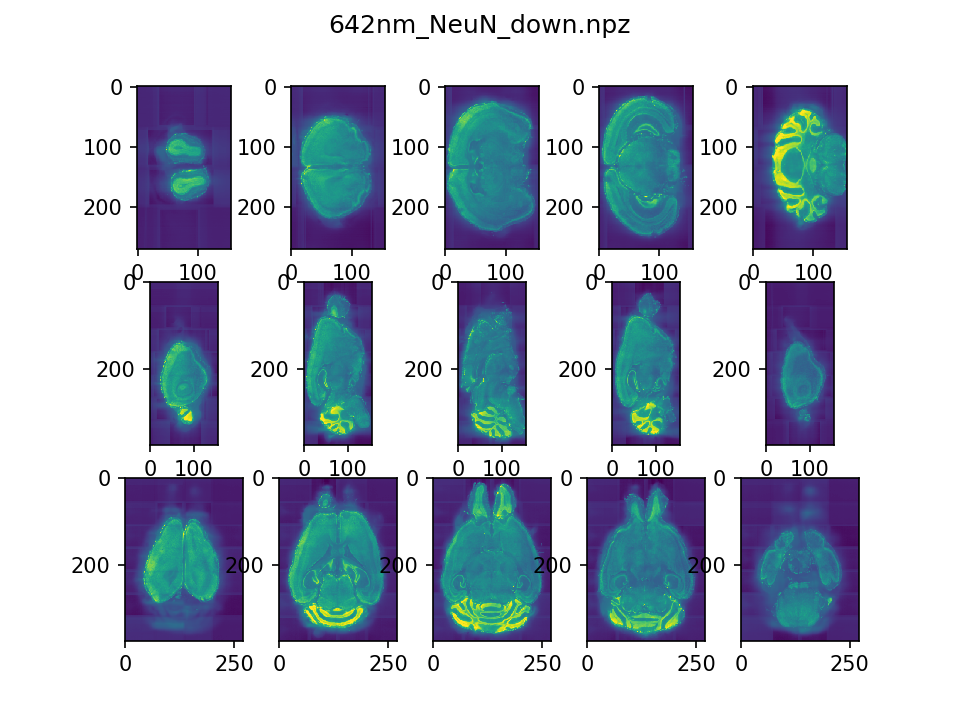

4294967296 4294967296


In [95]:
imp.reload(dw)
fig,ax = dw.draw_slices(Id,xId)
fig.suptitle(output_filename)
fig.savefig(output_filename.replace('npz','jpg'))

In [75]:
f.close()

AttributeError: 'Figure' object has no attribute 'close'

In [78]:
xId

[array([-3875., -3825., -3775., -3725., -3675., -3625., -3575., -3525.,
        -3475., -3425., -3375., -3325., -3275., -3225., -3175., -3125.,
        -3075., -3025., -2975., -2925., -2875., -2825., -2775., -2725.,
        -2675., -2625., -2575., -2525., -2475., -2425., -2375., -2325.,
        -2275., -2225., -2175., -2125., -2075., -2025., -1975., -1925.,
        -1875., -1825., -1775., -1725., -1675., -1625., -1575., -1525.,
        -1475., -1425., -1375., -1325., -1275., -1225., -1175., -1125.,
        -1075., -1025.,  -975.,  -925.,  -875.,  -825.,  -775.,  -725.,
         -675.,  -625.,  -575.,  -525.,  -475.,  -425.,  -375.,  -325.,
         -275.,  -225.,  -175.,  -125.,   -75.,   -25.,    25.,    75.,
          125.,   175.,   225.,   275.,   325.,   375.,   425.,   475.,
          525.,   575.,   625.,   675.,   725.,   775.,   825.,   875.,
          925.,   975.,  1025.,  1075.,  1125.,  1175.,  1225.,  1275.,
         1325.,  1375.,  1425.,  1475.,  1525.,  1575.,  1625., 